# <font size=6 color='green'><center>**IT 496 - Introduction to Data Mining**</center></font>
### **<center>Course Project - 02<br/><br/>Data Preprocessing, EDA and Classification Analysis<center>**

 &emsp; **Group Name : <font color='#0099ff'>DataForce</font>** <br/>
 &emsp; **Group ID : <font color='#0099ff'>T06</font>**
 <br/>&emsp; **Dateset : <font color='#0099ff'>IP Network Traffic Flows</font>**

### <center>Introduction </center>

**Dataset Name**: IP Network Traffic Flows
     
  The given dataset is about the network flow statistics collected by performing packet captures over 6 days of April 2017. It contains information about an IP flow. An Ip flow consists of all traffic that belongs to the same communication context, that is the same connection between two network devices.  Information about a sequence of packets is included. Datafields like Source IP, destination IP, source and destination port addresses, protocols used, interarrival times(time gap between two packets), etc are stored and are collected through CICIFlowmeter app.

**Dataset link**:https://www.kaggle.com/datasets/jsrojas/ip-network-traffic-flows-labeled-with-87-apps <br/>
**Documentation**: https://github.com/Gangaraj-eng/IT496_DataForce_CourseProject1/blob/Course_Project_2/README.md


**Main problem statement - Application layer protocol identification** Based on the network flow details, the task is to classify which application layer protocol, the given flow used, based on attributes like number of forward and backward packets, flags used, forward and backward segments, etc.

### <center>Exploratory Data Analysis</center>

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
# the path of the csv file
# csv_file_path = "C:\\Users\\rajini bopparam\\sem_7\\IT496\\Project\\Dataset-Unicauca-Version2-87Atts.csv"
csv_file_path = "/kaggle/input/ip-network-traffic-flows-labeled-with-87-apps/Dataset-Unicauca-Version2-87Atts.csv"
DataSet = pd.read_csv(csv_file_path)

DataSet.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [ ]:
DataSet.shape

(3577296, 87)

The dataset contains $35,77,296$rows and $87$columns.

Reducing the number of instances as the dataset size is very large!!! Here wer are considering 1 lakh instances

In [ ]:
import random
# randomly select 1,00,000 instances
Data =  DataSet.sample(n=100000)
Data.shape

(100000, 87)

In [ ]:
# columns along with their type information
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 66217 to 42834
Data columns (total 87 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow.ID                      100000 non-null  object 
 1   Source.IP                    100000 non-null  object 
 2   Source.Port                  100000 non-null  int64  
 3   Destination.IP               100000 non-null  object 
 4   Destination.Port             100000 non-null  int64  
 5   Protocol                     100000 non-null  int64  
 6   Timestamp                    100000 non-null  object 
 7   Flow.Duration                100000 non-null  int64  
 8   Total.Fwd.Packets            100000 non-null  int64  
 9   Total.Backward.Packets       100000 non-null  int64  
 10  Total.Length.of.Fwd.Packets  100000 non-null  int64  
 11  Total.Length.of.Bwd.Packets  100000 non-null  float64
 12  Fwd.Packet.Length.Max        100000 non-null  int64  
 13  F

Most of the attributes are of numeric type, except a few nominal attributes like ProtocolName, Label, Source and destination IP addresses, and timestamp.

In [ ]:
Data.describe()

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.00000,...,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,38000.455630,12046.520970,6.004510,2.544925e+07,63.320390,67.115560,4.661573e+04,8.766579e+04,517.484570,9.15863,...,25.678680,2.946178e+05,1.815172e+05,5.147303e+05,1.657674e+05,8.523658e+06,1.368984e+06,9.743381e+06,7.246219e+06,102.685380
std,22032.030899,20456.161521,0.325101,4.010083e+07,917.186438,1256.145304,1.583004e+06,2.569776e+06,1076.397599,77.41462,...,6.025107,2.239914e+06,1.342274e+06,3.189541e+06,1.932496e+06,1.699631e+07,4.767123e+06,1.881841e+07,1.592856e+07,51.311271
min,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,3653.750000,443.000000,6.000000,6.310000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.00000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,91.000000
50%,49361.000000,3128.000000,6.000000,5.955400e+05,6.000000,5.000000,4.430000e+02,2.090000e+02,207.000000,0.00000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,126.000000
75%,53843.000000,3128.000000,6.000000,4.500173e+07,15.000000,16.000000,1.771000e+03,3.648000e+03,610.000000,6.00000,...,32.000000,4.900000e+01,0.000000e+00,6.500000e+01,2.000000e+00,7.782794e+06,0.000000e+00,8.348422e+06,5.447103e+06,130.000000
max,65533.000000,65520.000000,17.000000,1.200000e+08,127053.000000,315700.000000,3.349890e+08,7.036091e+08,27740.000000,3136.00000,...,44.000000,1.069967e+08,6.924068e+07,1.069967e+08,1.069967e+08,1.199996e+08,7.424357e+07,1.199996e+08,1.199996e+08,222.000000


Plotting the correlation matrix

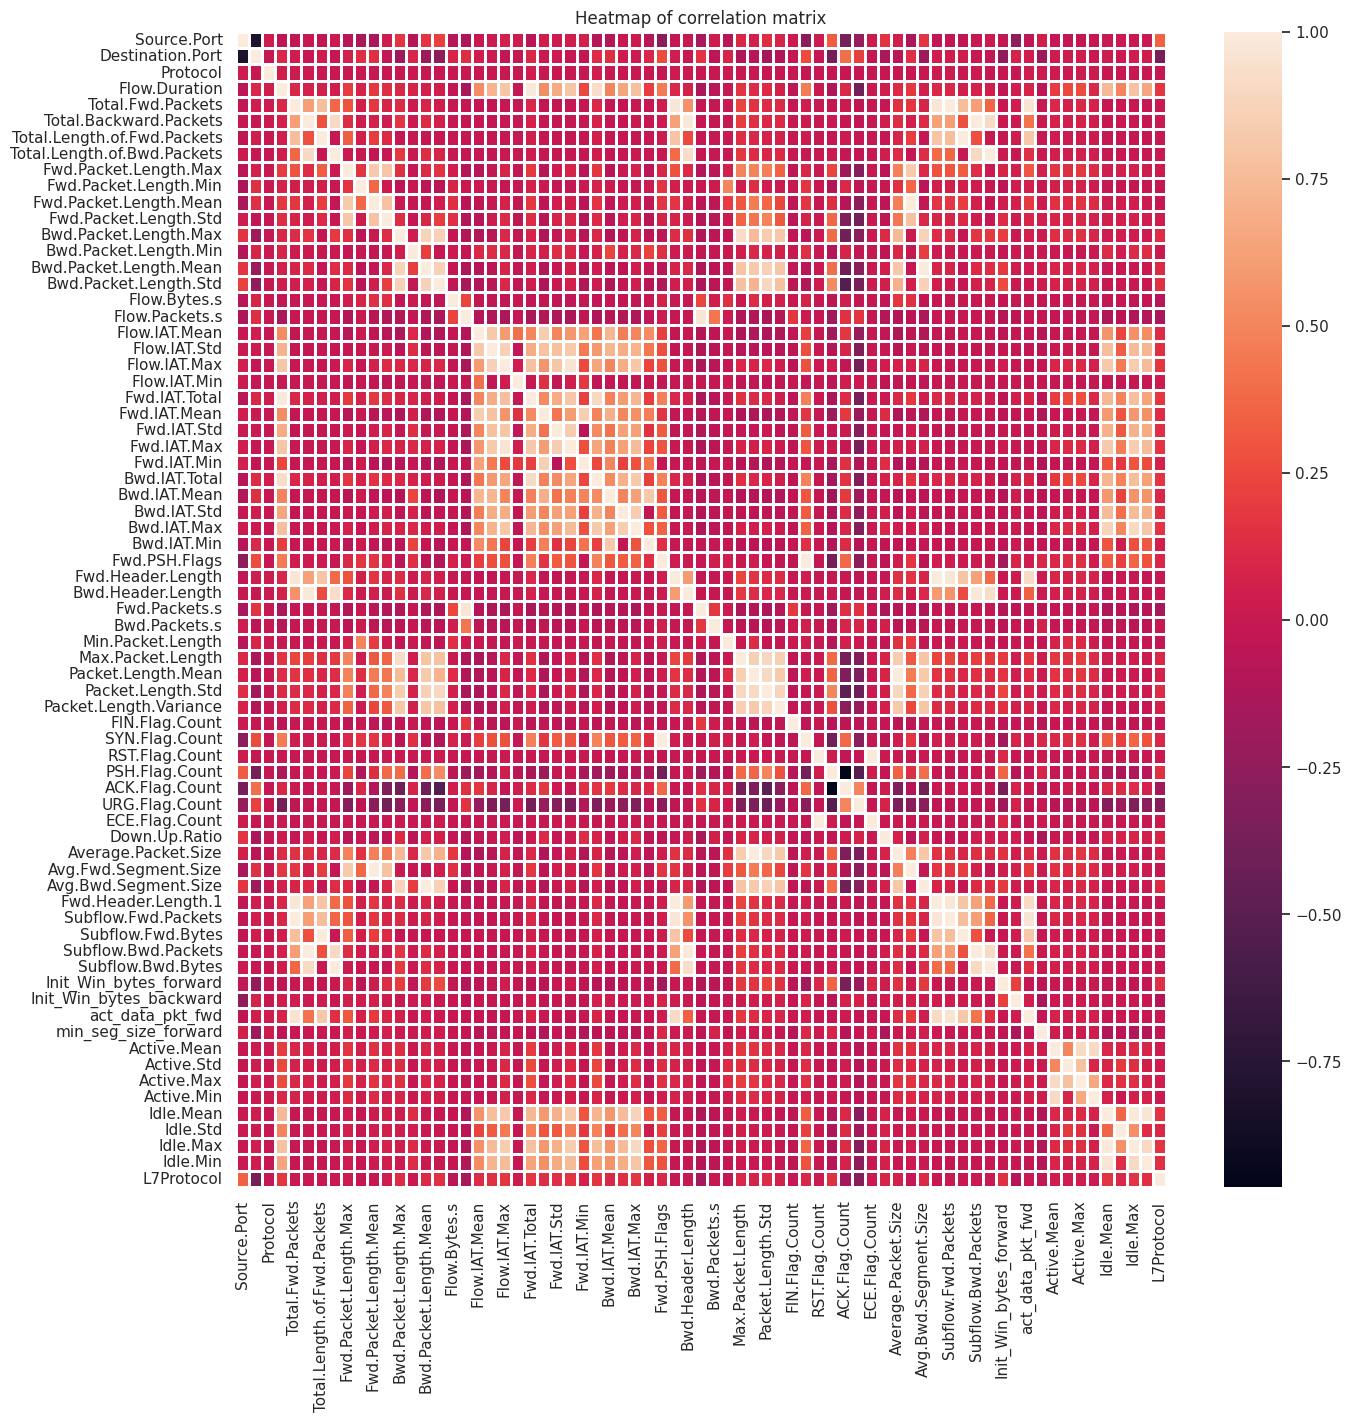

In [ ]:
numeric_data = Data.select_dtypes(include =[np.number]) # keep only numerical columns
numeric_data = numeric_data[[col for col in numeric_data if numeric_data[col].nunique() > 1]]
# considering only those columns which have more than one unique value
corr_matrix = numeric_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(data = corr_matrix, lw=1)
plt.title('Heatmap of correlation matrix')
plt.show()

Boxplots for the numeric columns

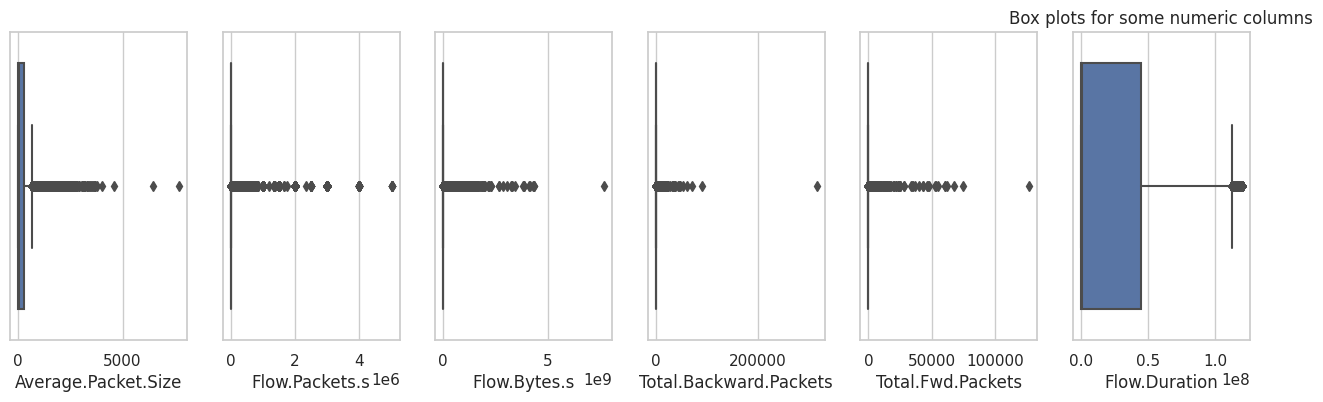

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(ipMeasureColumns):
    sns.boxplot(x=Data[col], ax=ax[axid])
plt.title('Box plots for some numeric columns')
plt.show()

All of these columns are right-skewed!!

In [ ]:
uniqueProtocols=Data['ProtocolName'].unique()
print(uniqueProtocols)

['GOOGLE' 'SSL' 'AMAZON' 'HTTP_CONNECT' 'YOUTUBE' 'HTTP_PROXY' 'HTTP'
 'GMAIL' 'DROPBOX' 'WINDOWS_UPDATE' 'APPLE_ICLOUD' 'APPLE' 'CLOUDFLARE'
 'NETFLIX' 'YAHOO' 'FACEBOOK' 'TWITTER' 'INSTAGRAM' 'MICROSOFT' 'MSN'
 'SKYPE' 'IP_ICMP' 'APPLE_ITUNES' 'EASYTAXI' 'OFFICE_365' 'SPOTIFY'
 'WIKIPEDIA' 'EBAY' 'MS_ONE_DRIVE' 'WHATSAPP' 'CONTENT_FLASH'
 'HTTP_DOWNLOAD' 'DNS' 'SSL_NO_CERT' 'LASTFM' 'MQTT' 'TEAMVIEWER' 'NTP'
 'GOOGLE_MAPS' 'FTP_CONTROL' 'UBUNTUONE' 'EDONKEY' 'TOR' 'FTP_DATA'
 'DEEZER' 'IP_OSPF' 'CITRIX_ONLINE' 'MSSQL' 'WAZE' 'TIMMEU' 'SKINNY']


Lets see the distribution of these protocols

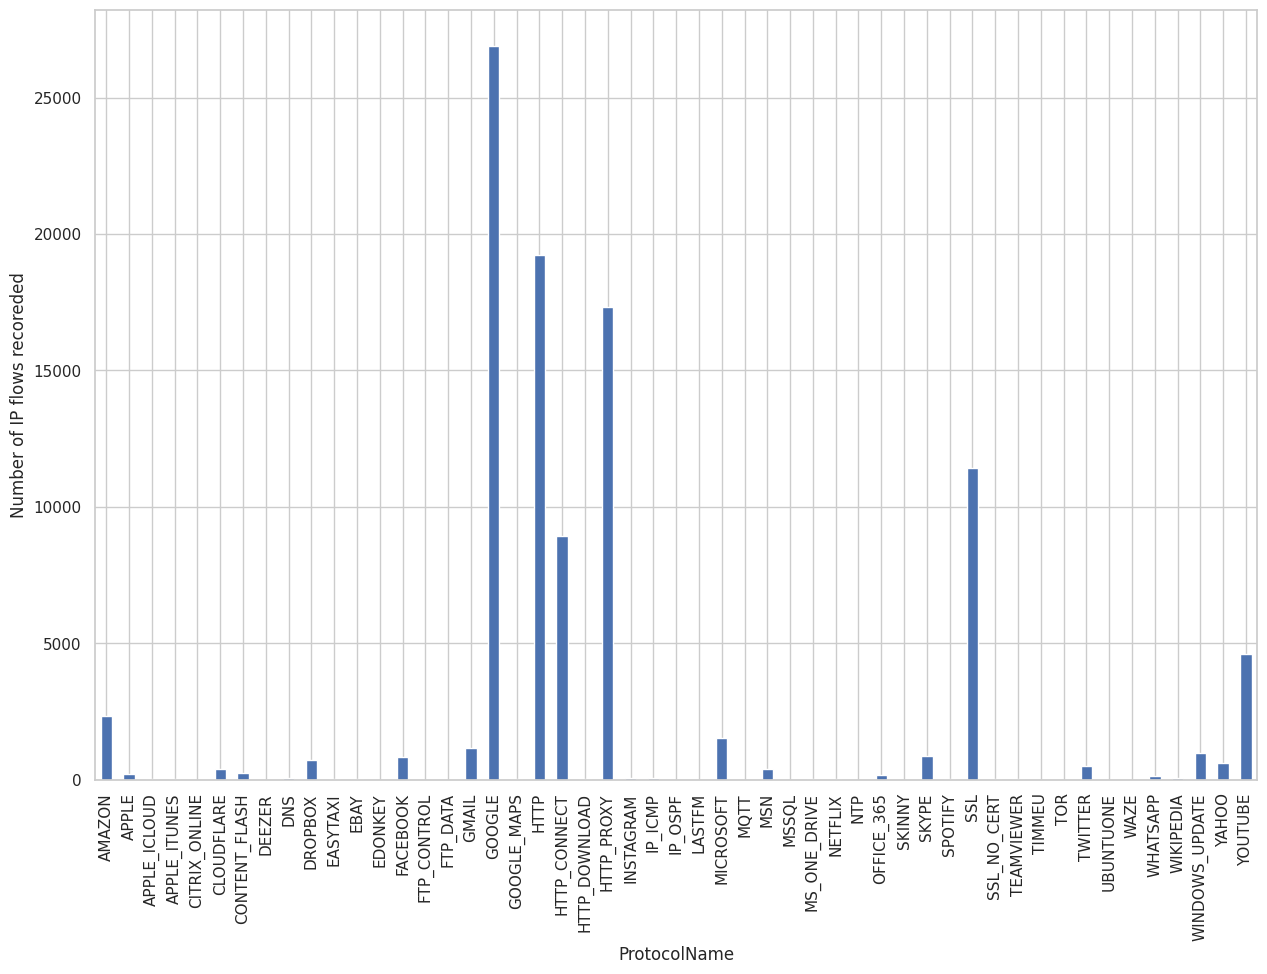

In [ ]:
Data.groupby('ProtocolName').size().plot(kind='bar',figsize=(15,10))
plt.ylabel('Number of IP flows recoreded')
plt.show()

We can see that most of the ip flows are using Google Protocol followed by HTTP and HTTP_Proxy!!

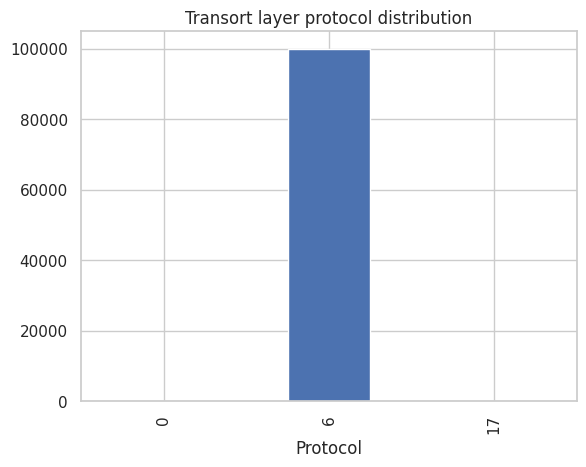

Protocol
0        55
6     99874
17       71
dtype: int64


In [ ]:
Data.groupby('Protocol').size().plot(kind='bar')
plt.title('Transort layer protocol distribution')
plt.show()
print(Data.groupby('Protocol').size())

In [ ]:
Data['Label'].unique()

array(['BENIGN'], dtype=object)

The label attribute has only a single value for all examples and thus not so useful in classification analysis!!. Hence, it can be ignored

In [ ]:
Data['Timestamp']

66217      26/04/201711:13:31
2573287    11/05/201710:49:02
1544837    28/04/201709:50:40
2155382    09/05/201710:13:38
2400252    11/05/201709:56:26
                  ...        
461108     27/04/201707:58:06
2791928    11/05/201711:12:50
339327     27/04/201707:43:11
2986387    11/05/201703:27:24
42834      26/04/201711:14:36
Name: Timestamp, Length: 100000, dtype: object

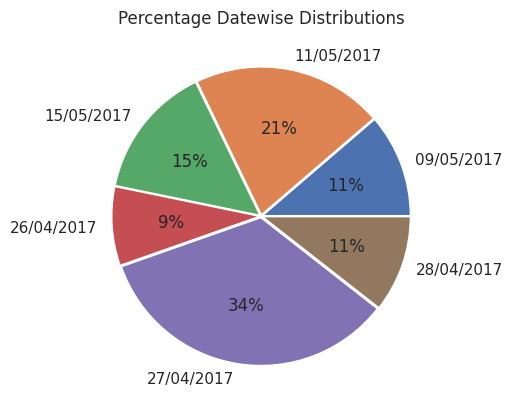

In [ ]:
def getDateFromTimeStamp(timestamp):
    return timestamp[0:10]

df=Data
df['Timestamp']=df['Timestamp'].apply(getDateFromTimeStamp)
df.groupby('Timestamp').size().plot(kind='pie',autopct='%1.0f%%', explode=[0.01]*6,title='Percentage Datewise Distributions')
plt.show()

The above plot shows the distribution of data recoreded on 6 days.

---

# 1.Application layer protocol identification

### <center>Data Preprocessing</center>

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [ ]:
# remove the rows that contains NULL values
Data.dropna(inplace=True)
Data.dropna(axis='columns')
Data.reset_index(drop=True, inplace=True)

#### Feature selection

Removing columns which are independent of protocol

In [ ]:
# columns to be removed
# as protocol doesn't depend on these attributes because they are just some identifiers
remove_columns = ['Flow.ID','Source.IP','Source.Port','Destination.IP','Destination.Port']

# protocol used is independent of the timestamp
remove_columns.append('Timestamp')

# L7Protocol and ProtocolName are same except one is label and other is string
remove_columns.append('L7Protocol')

Data.drop(remove_columns, axis = 1, inplace=True)

Removing columns having a single value for all instances

In [ ]:
frequencies = Data.nunique()
singleValuedColumns = frequencies[frequencies==1].index

In [ ]:
singleValuedColumns

Index(['Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'CWE.Flag.Count',
       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate',
       'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate',
       'Label'],
      dtype='object')

In [ ]:
Data.drop(singleValuedColumns, axis = 1, inplace = True)
Data.shape

(100000, 69)

#### Encoding for nominal attributes


In [ ]:
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(Data['ProtocolName'])
Data['ProtocolName'] = labelEncoder.transform(Data['ProtocolName'])
y = Data['ProtocolName']

### Reducing features for easy computation
As there are 69 features remaining for each instance, using all these features for prediction will be computationally too expensive and also the algorithm can't learn efficiently. To tackle this, some of the columns can be reduced and we can take only a few columns that are similarly correlated. We need to get the correlation of ProtocolName with other columns

In [ ]:
correlation_matrix = Data.corr()
correlation_matrix['ProtocolName']

Protocol                      -0.017252
Flow.Duration                 -0.041955
Total.Fwd.Packets              0.028610
Total.Backward.Packets         0.044518
Total.Length.of.Fwd.Packets    0.004804
                                 ...   
Idle.Mean                     -0.047420
Idle.Std                      -0.017098
Idle.Max                      -0.043389
Idle.Min                      -0.044835
ProtocolName                   1.000000
Name: ProtocolName, Length: 69, dtype: float64

In [ ]:
# sort values according to correlation coefficient
sortedOrder = correlation_matrix['ProtocolName'].sort_values(ascending = False)
columnDict = {}
final_features=[]
for colName in sortedOrder.keys():
    correlationMag = round(abs(sortedOrder[colName]), 2)
    corrincludeneg = sortedOrder[colName]
    if (correlationMag >= 0.01 and colName != 'ProtocolName'):
        if correlationMag in columnDict:
            columnDict[correlationMag].append(colName)
        else:
            columnDict[correlationMag] = [colName]
    elif (corrincludeneg < 0.01 and colName != 'ProtocolName'):
        final_features.append(colName)
print(len(columnDict))

13


In [ ]:
# selecting only single column for a particular correlation value
for corr, cols in columnDict.items():
    final_features.append(np.random.choice(cols))
Data = Data[final_features]
Data.head()

,Subflow.Fwd.Bytes,Total.Length.of.Fwd.Packets,Down.Up.Ratio,ECE.Flag.Count,RST.Flag.Count,Avg.Bwd.Segment.Size,Bwd.Packet.Length.Max,Max.Packet.Length,Bwd.Packet.Length.Std,Packet.Length.Mean,Fwd.IAT.Mean,Idle.Mean,Fwd.IAT.Min,Bwd.Packet.Length.Min,Flow.Packets.s,Avg.Fwd.Segment.Size,Bwd.IAT.Mean,ACK.Flag.Count
0,118451,118451,1,0,0,0.0,0,2195,0.0,502.962185,224180.4,0.0,39.0,0,10.571819,1172.782178,1.660596e+05,1
1,0,0,2,0,0,0.0,0,0,0.0,0.000000,0.0,0.0,0.0,0,52631.578947,0.000000,0.000000e+00,1
2,18,18,2,0,0,0.0,0,6,0.0,2.181818,45060986.5,45060897.5,45053297.0,0,0.110960,6.000000,1.502036e+07,1
3,6,6,1,0,0,6.0,6,6,0.0,6.000000,0.0,0.0,0.0,6,2288.329519,6.000000,0.000000e+00,1
4,0,0,1,0,0,0.0,0,0,0.0,0.000000,0.0,0.0,0.0,0,191.534189,0.000000,0.000000e+00,1


### <center>Classification Analysis</center>

Train and Test splits

In [ ]:
xData = Data
yData = y
x_train, x_test, y_train, y_test = train_test_split(xData, yData, random_state = 40, test_size = 0.20)

print(f"Training size = {len(y_train)}")
print(f"Test size = {len(y_test)}")
x_train.shape, x_test.shape

Training size = 80000
Test size = 20000


((80000, 77), (20000, 77))

#### Normalization and outlier removal

We can use sklearn RobustScaler for normalization and to remove outliers using standard IQR method

In [ ]:
# normalizing train and test sets seperately so that no information from
# test set will be leaked
scaler = RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(f"Shape of training data after normalizing = {x_train.shape}")
print(f"Shape of test data after normalizing = {x_test.shape}")

Shape of training data after normalizing = (80000, 18)
Shape of test data after normalizing = (20000, 18)



The number of rows remained unchanged suggesting absence of major outliers
Here, Train and Test sets are normalized seperately so that there will be no leakage of information from test set while training

#### Classification Models

We are using the following models for classification:

1. Logistic Regression
2. Linear SVM
3. Decision Tree Classifier
4. Random Forest Classifier

---